In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import gc

In [2]:
'''
    Results are computed using the "global" homophily code in EmpiricalExperiments/Code
    There is no need for bootstrapping in this data as we use a 
    generative model, so we average over multiple instantiations
'''
result_dir = "./Results/"

models = pickle.load(open("./models.pkl", "rb"))

In [3]:
all_dfs = []
all_files = np.sort(os.listdir(result_dir))
for file in all_files:
    if file.startswith("global"):
        curr_df = pd.read_csv(f"{result_dir}{file}", index_col=0)
        all_dfs.append(curr_df)

In [4]:
results_df = pd.concat(all_dfs).reset_index(drop=True)
results_df['model'] = results_df['dataset'].str.split("-").apply(lambda x: "-".join(x[0:3]))

In [5]:
tbl = results_df[['model', 'hypergraph_ratio', 'simplicial_ratio']].fillna(0).groupby("model").agg(['mean', 'std'])

In [6]:
## output for matplotlib fig 1
x_vals = []
hy_vals = []
hy_err = []
sy_vals = []
sy_err = []
for model, metric_df in tbl.iterrows():
    if ("sweep1" in model):
        n, p1, q1, p2, q2 = models[model]
        x_vals.append(p1 / q1)
        hy_vals.append(metric_df['hypergraph_ratio']['mean'])
        hy_err.append(metric_df['hypergraph_ratio']['std'])
        sy_vals.append(metric_df['simplicial_ratio']['mean'])
        sy_err.append(metric_df['simplicial_ratio']['std'])
x_vals = np.array(x_vals[1:-1])
hy_vals = np.array(hy_vals[1:-1])
hy_err = np.array(hy_err[1:-1])
sy_vals = np.array(sy_vals[1:-1])
sy_err = np.array(sy_err[1:-1])

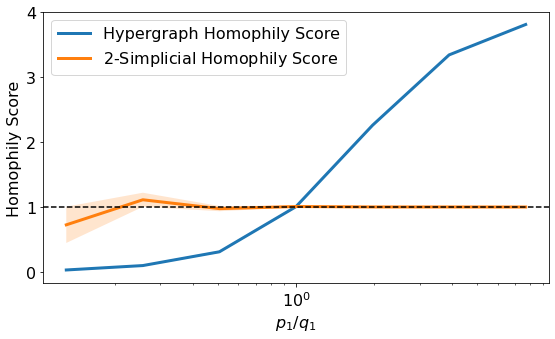

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16)

err_mag = 1.96 / np.sqrt(50)

plt.figure(figsize=(8,5))
plt.plot(x_vals, hy_vals, label="Hypergraph Homophily Score", linewidth=3)
plt.fill_between(x_vals, hy_vals - hy_err * err_mag, hy_vals + hy_err * err_mag, alpha=0.2)
plt.plot(x_vals, sy_vals, label="$2$-Simplicial Homophily Score", linewidth=3)
plt.fill_between(x_vals, sy_vals - sy_err * err_mag, sy_vals + sy_err * err_mag, alpha=0.2)
plt.xscale("log")
plt.axhline(y=1.0, color='black', linestyle='--')
plt.ylabel("Homophily Score")
plt.xlabel("$p_1 / q_1$")
plt.legend()
plt.tight_layout()
plt.savefig("p1sweep.png", dpi=300)

In [8]:
## output for matplotlib fig 2
x_vals = []
hy_vals = []
hy_err = []
sy_vals = []
sy_err = []
for model, metric_df in tbl.iterrows():
    if ("sweep2" in model):
        n, p1, q1, p2, q2 = models[model]
        x_vals.append(p2 / q2)
        hy_vals.append(metric_df['hypergraph_ratio']['mean'])
        hy_err.append(metric_df['hypergraph_ratio']['std'])
        sy_vals.append(metric_df['simplicial_ratio']['mean'])
        sy_err.append(metric_df['simplicial_ratio']['std'])

x_vals = np.array(x_vals[1:-1])
hy_vals = np.array(hy_vals[1:-1])
hy_err = np.array(hy_err[1:-1])
sy_vals = np.array(sy_vals[1:-1])
sy_err = np.array(sy_err[1:-1])

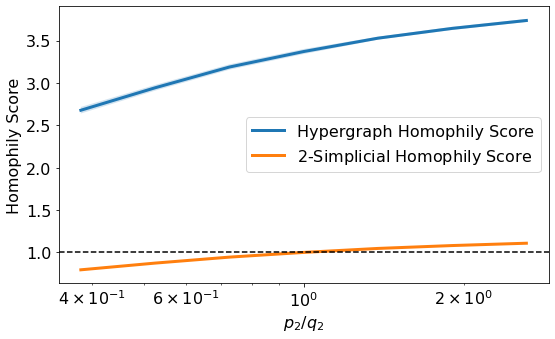

In [9]:
plt.figure(figsize=(8,5))
plt.plot(x_vals, hy_vals, label="Hypergraph Homophily Score", linewidth=3)
plt.fill_between(x_vals, hy_vals - hy_err, hy_vals + hy_err, alpha=0.2)
plt.plot(x_vals, sy_vals, label="$2$-Simplicial Homophily Score", linewidth=3)
plt.fill_between(x_vals, sy_vals - sy_err, sy_vals + sy_err, alpha=0.2)
plt.xscale("log")
plt.axhline(y=1.0, color='black', linestyle='--')
plt.ylabel("Homophily Score")
plt.xlabel("$p_2 / q_2$")
plt.legend()

plt.tight_layout()
plt.savefig("p2sweep.png", dpi=300)